In [19]:
# Chargement de données 
df=pd.read_csv('ACP.csv')
df.head()

,Modele,CYL,PUISS,LONG,LAR,POID,V.MAX
0,Alfasud TI,1350,79,393,161,870,165
1,Audi 100,1588,85,468,177,1110,160
2,Simca 1300,1294,68,424,168,1050,152
3,Citroen GS Club,1222,59,412,161,930,151
4,Fiat 132,1585,98,439,164,1105,165


In [26]:
# Valeur moyenne
M=df.mean()
M
# Ecart-type
st=df.std()
st

CYL      373.929846
PUISS     20.376281
LONG      22.107358
LAR        5.313689
POID     136.957808
V.MAX     12.140383
dtype: float64

## Etape 2 : « Fabriquer » la matrice centrée et réduite qu’on notera Ac 

In [27]:
# Ac centrée et reduite
Ac=(df-M)/st
Ac

,CYL,PUISS,LONG,LAR,POID,V.MAX
0,-0.753261,-0.275375,-1.831969,-1.066428,-1.524800,0.553708
1,-0.116778,0.019085,1.560566,1.944663,0.227564,0.141859
2,-0.903021,-0.815218,-0.429721,0.250924,-0.210527,-0.517099
3,-1.095571,-1.256908,-0.972527,-1.066428,-1.086709,-0.599469
4,-0.124801,0.657082,0.248786,-0.501848,0.191056,0.553708
5,-0.894999,-0.128145,-0.203552,0.439117,0.008518,0.141859
6,0.439476,-0.275375,0.701124,0.439117,0.592640,-0.352359
7,-0.178287,-1.453215,-0.429721,-0.690042,-0.502588,-1.505536
8,2.760767,2.129382,0.836825,1.191890,1.760883,1.789254
9,-1.245332,-1.453215,-1.560566,-1.819201,-1.926384,-1.505536


## Etape 3 : Calculer la matrice de correlation C

In [28]:
# la matrice de correlation C
C=Ac.corr()
C

,CYL,PUISS,LONG,LAR,POID,V.MAX
CYL,1.000000,0.796628,0.701462,0.629757,0.788952,0.664934
PUISS,0.796628,1.000000,0.641362,0.520832,0.765293,0.844379
LONG,0.701462,0.641362,1.000000,0.849266,0.868090,0.475928
LAR,0.629757,0.520832,0.849266,1.000000,0.716874,0.472945
POID,0.788952,0.765293,0.868090,0.716874,1.000000,0.477596
V.MAX,0.664934,0.844379,0.475928,0.472945,0.477596,1.000000




## Etape 4 : Déterminer les vecteurs et les valeurs propres de C

In [29]:
# les valeurs propres et les vecteurs propres avec .eig
# V contient les valeurs propres et D contient les vecteurs propres 
V, D=np.linalg.eig(C)

La quantité totale (ou inertie totale) contenue dans C est la trace de C qui est égale aussi à la somme des valeurs propres (je rappelle ici que la trace d’une matrice carrée est la somme de tous les éléments
diagonaux)

In [33]:
print('La somme des valeurs propres est  :' , np.sum(V))
print('La trace de C est :' , np.trace(C))

La somme des valeurs propres est  : 5.999999999999999
La trace de C est : 6.0


## Etape 5 : Choisir les composantes principales

In [34]:
D

array([[ 0.42493602,  0.12419108,  0.35361252,  0.80778648,  0.15158003,
        -0.05889517],
       [ 0.42179441,  0.41577389,  0.18492049, -0.35779199, -0.29373465,
        -0.63303302],
       [ 0.42145993, -0.41181773, -0.06763394, -0.27975231,  0.73056903,
        -0.19029153],
       [ 0.38692224, -0.446087  , -0.60486812,  0.21156941, -0.47819008,
        -0.10956624],
       [ 0.43051198, -0.24267581,  0.48439601, -0.30171136, -0.30455842,
         0.5808122 ],
       [ 0.35894427,  0.6198626 , -0.48547226, -0.0735743 ,  0.18865511,
         0.45852167]])

In [35]:
print(pd.DataFrame(V))
pd.DataFrame(D)

          0
0  4.420858
1  0.856062
2  0.373066
3  0.213922
4  0.092801
5  0.043290


,0,1,2,3,4,5
0,0.424936,0.124191,0.353613,0.807786,0.151580,-0.058895
1,0.421794,0.415774,0.184920,-0.357792,-0.293735,-0.633033
2,0.421460,-0.411818,-0.067634,-0.279752,0.730569,-0.190292
3,0.386922,-0.446087,-0.604868,0.211569,-0.478190,-0.109566
4,0.430512,-0.242676,0.484396,-0.301711,-0.304558,0.580812
5,0.358944,0.619863,-0.485472,-0.073574,0.188655,0.458522


In [36]:
# quantité d'information dans Up1
Up1=D[:, 0:1]
Up1

array([[0.42493602],
       [0.42179441],
       [0.42145993],
       [0.38692224],
       [0.43051198],
       [0.35894427]])

In [37]:
Up1_pour=(V[0]/sum(V))*100
Up1_pour

73.68096766014817

On remarque ainsi que la composante portée par le vecteur propre Up1 Porte à elle seule 73.68 % , càd un peu moins de 74% de l’information totale contenue dans la matrice C !

La deuxième composante principale Up2 portée par la deuxième vecteur colonne  de Matrix_V  porte  14.26% ! de l'information totale contenue dans la matrice C !!

In [38]:
# quantité d'information dans Up2
Up2=D[:,1:2]
Up2

array([[ 0.12419108],
       [ 0.41577389],
       [-0.41181773],
       [-0.446087  ],
       [-0.24267581],
       [ 0.6198626 ]])

In [39]:
Up2_pour=(V[1]/sum(V))*100
Up2_pour

14.267704820765982

# Etape 6 : Choix des vecteurs caractéristiques (ou Feature Vectors) qu’on notera FV
Dans ce qui suit on va « compresser » la matrice Ac respectivement à 74% et 87%.
Compression à 73% :

In [40]:
# Factoriels vectors Up1
FV=Up1

et on aura une matrice Ac compressé égale à :
Ac_comp=Ac @ FV

In [41]:
# Ac_compressée: Ac_comp
Ac_comp= Ac @ FV
Ac_comp

,0
0,-2.078660
1,1.517465
2,-1.087847
3,-2.501227
4,0.415801
5,-0.295666
6,0.664659
7,-1.893594
8,4.285492
9,-3.873484


In [42]:
#Ac_comp

Chaque composante de ce vecteur représente les coordonnées de la voiture lui correspondant dans
la base des axes principaux qui est dans notre cas actuel constituée par un seul vecteur à savoir Up1.
On a par exemple les coordonnées de l’Audi 100 (qui est la deuxième voiture dans df) dans
la base FV est de -1.517465.

Maintenant comment pourrait-on « décompresser la matrice » Ac_comp ? Il ne faut pas à ce stade
oublier qu’on vient d’effectuer une compression à un peu plus de 74% càd qu’on quand même une
perte de 26% de l’information. On récupérera les données décompressées dans Ac_décom en utilisant
la formule : Ac_décomp = Ac_comp @ FV.T

In [43]:
# Ac_décomp
Ac_décomp=Ac_comp @ FV.transpose()
Ac_décomp

,0,1,2,3,4,5
0,-0.883298,-0.876767,-0.876072,-0.804280,-0.894888,-0.746123
1,0.644826,0.640058,0.639551,0.587141,0.653287,0.544685
2,-0.462265,-0.458848,-0.458484,-0.420912,-0.468331,-0.390476
3,-1.062862,-1.055004,-1.054167,-0.967780,-1.076808,-0.897801
4,0.176689,0.175382,0.175243,0.160882,0.179007,0.149249
5,-0.125639,-0.124710,-0.124611,-0.114400,-0.127288,-0.106128
6,0.282438,0.280349,0.280127,0.257171,0.286144,0.238576
7,-0.804656,-0.798708,-0.798074,-0.732674,-0.815215,-0.679695
8,1.821060,1.807596,1.806163,1.658152,1.844956,1.538253
9,-1.645983,-1.633814,-1.632518,-1.498737,-1.667581,-1.390365


On voit bien que cette matrice Ac_decomp n’a rien à voir avec la matrice de départ A. En effet, il
s’agit la « seulement » des données centrées-reduites décompressées. Pour retrouver A décompressée (quon
notera A_decomp).

Compression à 88% :

In [44]:
# factoriels vectors FV= Up1 Up2
FV=D[:, 0:2]
A_comp= Ac @ FV
A_comp.shape

(18, 2)

In [45]:
A_comp


,0,1
0,-2.078660,1.735370
1,1.517465,-1.484016
2,-1.087847,-0.655501
3,-2.501227,0.109704
4,0.415801,0.675970
5,-0.295666,-0.190622
6,0.664659,-0.906768
7,-1.893594,-0.952824
8,4.285492,1.033666
9,-3.873484,0.229584


In [46]:
# Ac_décomp
Ac_decomp= A_comp @ FV.T
Ac_decomp

,0,1,2,3,4,5
0,-0.667780,-0.155246,-1.590728,-1.578406,-1.316020,0.329568
1,0.460524,0.023043,1.250695,1.249141,1.013422,-0.375201
2,-0.543673,-0.731388,-0.188537,-0.128502,-0.309257,-0.796797
3,-1.049237,-1.009392,-1.099345,-1.016718,-1.103431,-0.829800
4,0.260638,0.456433,-0.103133,-0.140659,0.014966,0.568258
5,-0.149313,-0.203966,-0.046110,-0.029366,-0.081028,-0.224287
6,0.169825,-0.096661,0.653550,0.661669,0.506194,-0.323496
7,-0.922989,-1.194867,-0.405684,-0.307631,-0.583988,-1.270315
8,1.949432,2.237368,1.380481,1.197047,1.594110,2.178983
9,-1.617471,-1.538359,-1.727065,-1.601152,-1.723296,-1.248054


# ACP avec Sklearn pour la visualisation des données

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# ACP avec n_components=2
data=pd.read_csv('ACP.csv')
data.drop('Modele', axis=1, inplace=True)
data.head(2)

,CYL,PUISS,LONG,LAR,POID,V.MAX
0,1350,79,393,161,870,165
1,1588,85,468,177,1110,160


In [4]:
# StandardScaler
sc=StandardScaler()
X=sc.fit_transform(data)


In [5]:
X

array([[-0.77509889, -0.28335818, -1.88508077, -1.09734528, -1.56900676,
         0.56976043],
       [-0.12016326,  0.01963869,  1.60580955,  2.0010414 ,  0.23416142,
         0.14597168],
       [-0.92920139, -0.83885242, -0.44217944,  0.25819889, -0.21663062,
        -0.53209032],
       [-1.12733318, -1.29334771, -1.00072189, -1.09734528, -1.11821472,
        -0.61684807],
       [-0.12841875,  0.67613189,  0.25599862, -0.51639778,  0.19659542,
         0.56976043],
       [-0.9209459 , -0.13185975, -0.20945342,  0.45184806,  0.0087654 ,
         0.14597168],
       [ 0.45221746, -0.28335818,  0.72145067,  0.45184806,  0.60982146,
        -0.36257482],
       [-0.18345536, -1.49534562, -0.44217944, -0.71004695, -0.51715865,
        -1.54918332],
       [ 2.84080623,  2.19111619,  0.86108628,  1.22644473,  1.81193359,
         1.84112668],
       [-1.28143568, -1.49534562, -1.60580955, -1.87194195, -1.98223281,
        -1.54918332],
       [-0.16969621,  1.23162613, -0.25599862, -0.

In [50]:
# ACP
model=PCA(n_components=2)
X_comp=model.fit_transform(X)

In [51]:
# explained_variance_ratio: pourcentage de variance pour chacune de nos composantes
model.explained_variance_ratio_*100

array([73.68096766, 14.26770482])

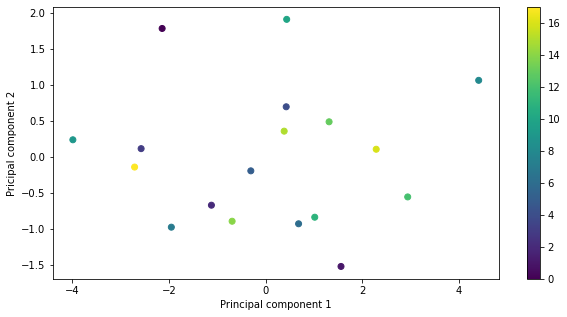

In [52]:
# les voitures dans 2D
plt.figure(figsize=(10,5))
plt.scatter(X_comp[:, 0], X_comp[:, 1],c=np.arange(18))
plt.xlabel('Principal component 1')
plt.ylabel('Pricipal component 2')
plt.colorbar()
plt.show()

In [53]:
# Pour savoir à quoi ressemblent les axes de ce graphiques il faut analyser les composantes de chaque axe
model.components_

array([[ 0.42493602,  0.42179441,  0.42145993,  0.38692224,  0.43051198,
         0.35894427],
       [ 0.12419108,  0.41577389, -0.41181773, -0.446087  , -0.24267581,
         0.6198626 ]])

In [54]:
#model.components_

In [55]:
# retrouver nos données initiales !!!
X_decomp=model.inverse_transform(X_comp)
X_decomp

array([[-0.68714004, -0.15974647, -1.6368457 , -1.6241662 , -1.35417384,
         0.3391225 ],
       [ 0.47387522,  0.02371103,  1.28695448,  1.28535587,  1.04280237,
        -0.38607854],
       [-0.55943466, -0.75259209, -0.19400286, -0.13222707, -0.31822269,
        -0.81989747],
       [-1.07965636, -1.03865558, -1.1312167 , -1.04619406, -1.1354209 ,
        -0.85385718],
       [ 0.26819434,  0.46966566, -0.10612313, -0.14473684,  0.01539943,
         0.58473234],
       [-0.15364146, -0.20987928, -0.04744643, -0.03021689, -0.08337739,
        -0.23078966],
       [ 0.17474853, -0.09946343,  0.67249777,  0.68085164,  0.52086972,
        -0.33287478],
       [-0.94974758, -1.22950797, -0.41744566, -0.31654998, -0.60091837,
        -1.30714333],
       [ 2.00594882,  2.30223229,  1.42050343,  1.23175145,  1.64032553,
         2.2421554 ],
       [-1.66436358, -1.58295814, -1.77713557, -1.64757164, -1.77325693,
        -1.28423718],
       [ 0.42348573,  0.97974779, -0.60312467, -0.

# Reduction de dimension

In [56]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA


In [57]:
# ACP avec n_components=6
data=pd.read_csv('ACP.csv')
data.drop('Modele', axis=1, inplace=True)
sc=StandardScaler()
X=sc.fit_transform(data)
model=PCA(n_components=6)
X_comp=model.fit_transform(X)

In [58]:
X_comp.shape

(18, 6)

In [59]:
 # pourcentage de variance pour chacune de nos composantes
model.explained_variance_ratio_*100

array([73.68096766, 14.26770482,  6.21776796,  3.56536815,  1.54668687,
        0.72150454])

In [60]:
# la somme cumulée de toute ces pourcentages
np.cumsum(model.explained_variance_ratio_)*100

array([ 73.68096766,  87.94867248,  94.16644044,  97.73180859,
        99.27849546, 100.        ])

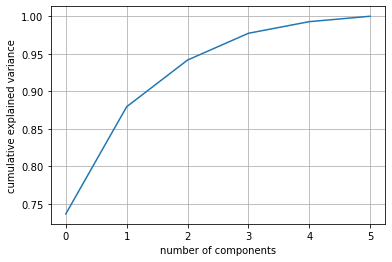

In [61]:
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid(True)
plt.show()

In [62]:
# pour identifier le nombre de composantes pour garder 90% de l'information
np.argmax(np.cumsum(model.explained_variance_ratio_)>0.90)


2

In [63]:
# final model
final_model=PCA(n_components=3)
final_model.fit_transform(X)

array([[-2.13892361,  1.78568102,  0.57186228],
       [ 1.56145859, -1.52704027,  1.31527135],
       [-1.11938528, -0.67450517,  0.4565881 ],
       [-2.5737417 ,  0.11288416,  0.1485698 ],
       [ 0.4278552 ,  0.69556731, -0.19328567],
       [-0.30423764, -0.19614878,  0.67580317],
       [ 0.6839285 , -0.93305677, -0.25682308],
       [-1.94849257, -0.98044805, -0.61957488],
       [ 4.40973457,  1.06363317, -0.59352842],
       [-3.98578242,  0.23624042, -0.30313336],
       [ 0.43765819,  1.91244816,  0.02494224],
       [ 1.01817538, -0.8417121 ,  0.21661021],
       [ 2.94108031, -0.55917459, -1.24398816],
       [ 1.31488038,  0.48652246,  0.2826214 ],
       [-0.69111137, -0.89772139, -0.62840689],
       [ 0.38570887,  0.35618457, -0.07558299],
       [ 2.28976824,  0.10434464,  0.79638378],
       [-2.70857363, -0.1436988 , -0.57432888]])